In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('covid_19_india.csv')

In [6]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [7]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


##### Data Analysis 

In [8]:
df[['State/UnionTerritory']].value_counts()

State/UnionTerritory                    
Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Tamil Nadu                                  523
Ladakh                                      523
Jammu and Kashmir                           521
Punjab                                      521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
West Bengal                                 512
Puducherry                                  512
Chandigarh                                  511
Chhattisgarh                                511
Gujarat                                     510
Madhya Pradesh                              508

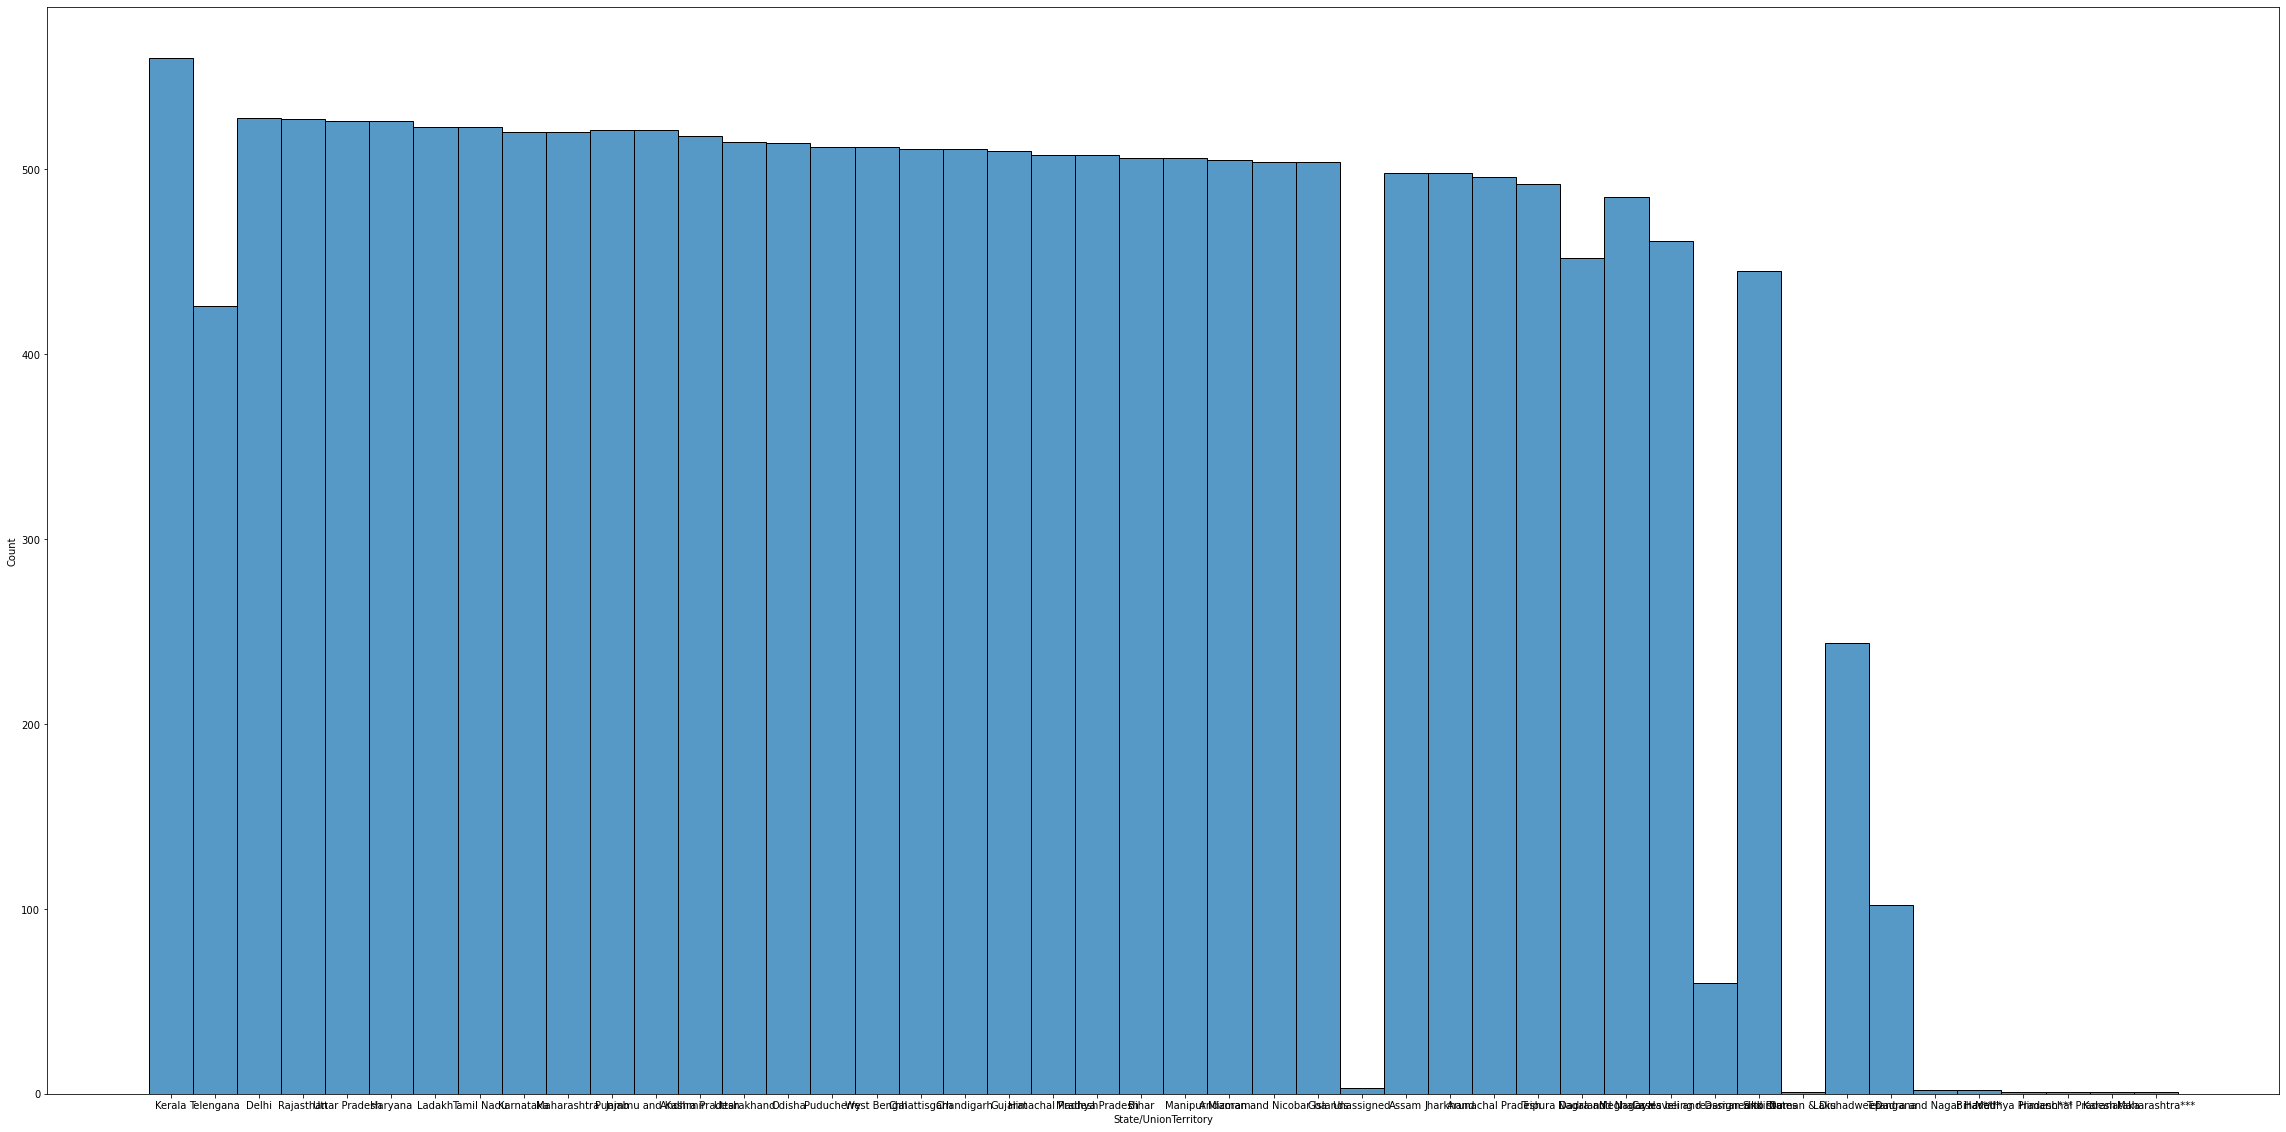

In [9]:
plt.figure(figsize=(40,20))
sns.histplot(x="State/UnionTerritory",data=df)
plt.show()



In [10]:
cd=df.corr()

In [11]:
cd

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.408482,0.301742,0.403012
Cured,0.408482,1.000000,0.917529,0.997751
Deaths,0.301742,0.917529,1.000000,0.918346
Confirmed,0.403012,0.997751,0.918346,1.000000


###### from the above analysis we understand the correltion of cured death and confirmed

<AxesSubplot:>

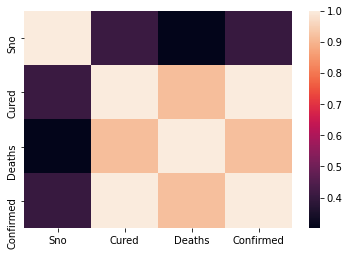

In [12]:
sns.heatmap(cd)

##### we analysis from which state having the most cured according to the states wise

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='count'>

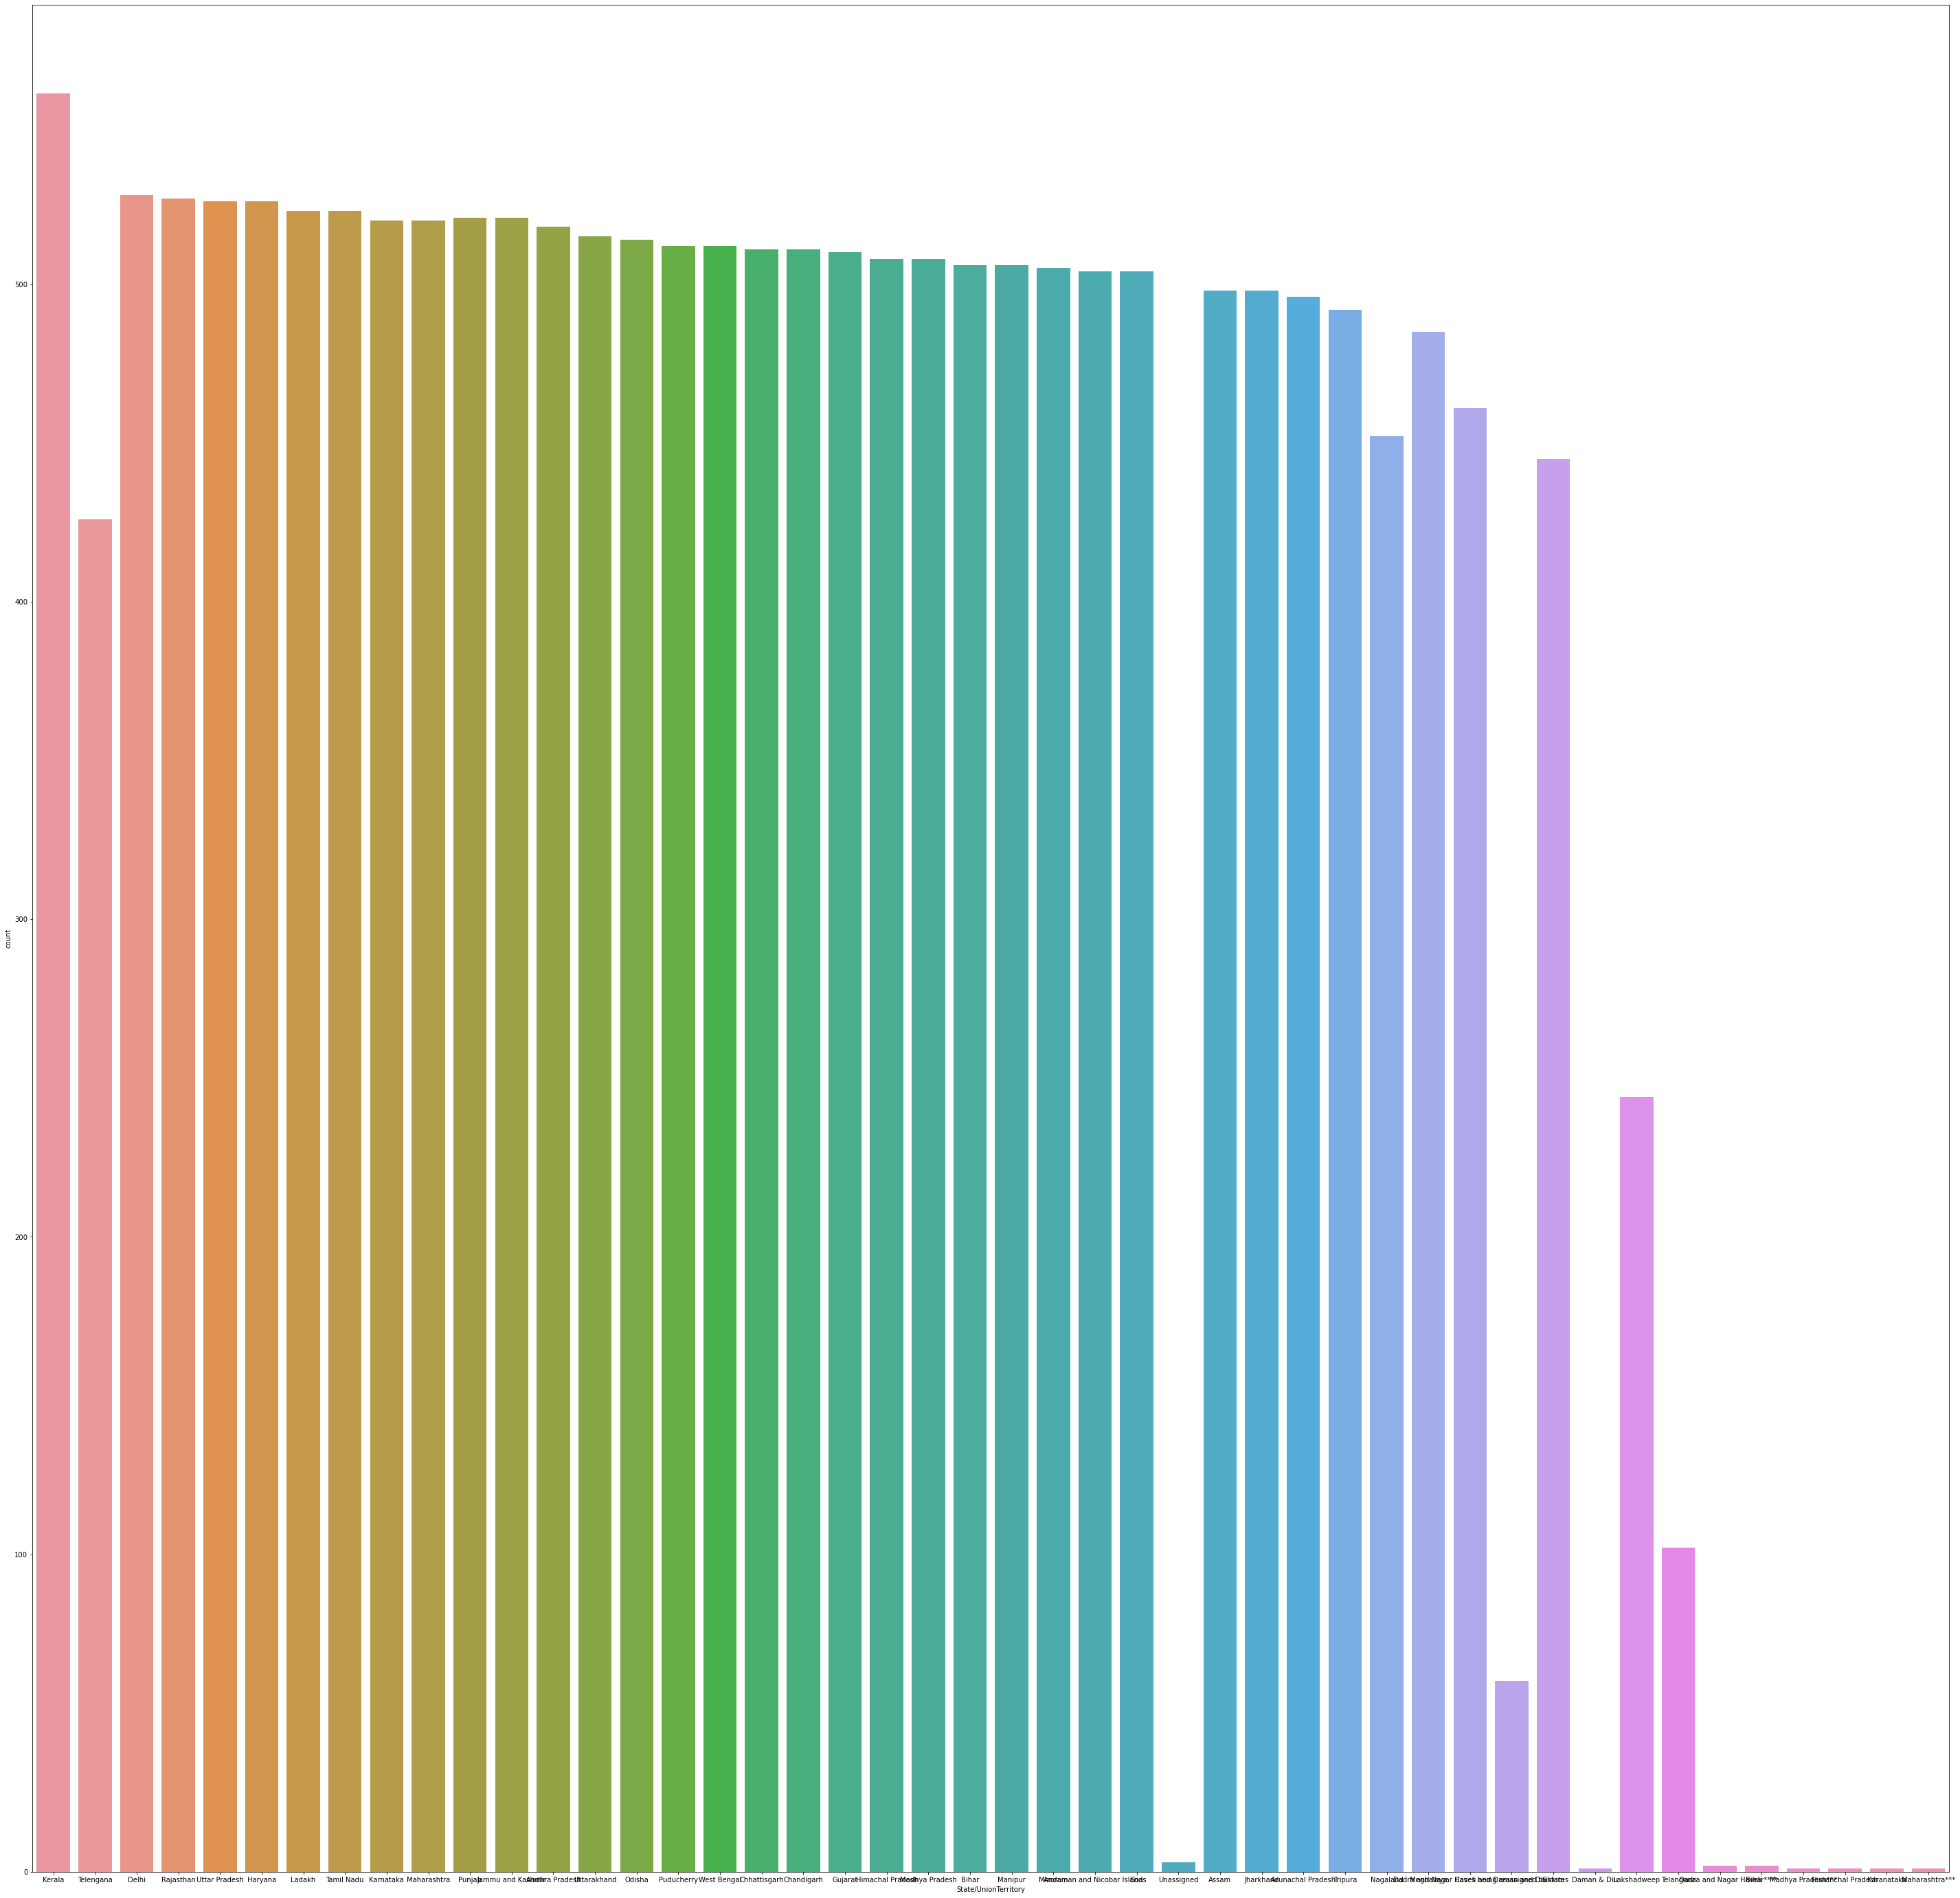

In [13]:
plt.figure(figsize=(50,50))
sns.countplot(x="State/UnionTerritory",data=df)

##### 

##### Label Encoding perform here

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le=LabelEncoder()

In [20]:
df[['state_n']]=Le.fit_transform(df[["State/UnionTerritory"]])

In [61]:
df['state_n'].value_counts()

22    560
12    528
36    527
43    526
15    526
23    523
38    523
35    521
18    521
21    520
27    520
1     518
44    515
33    514
34    512
45    512
8     511
7     511
14    510
25    508
16    508
4     506
29    506
31    505
0     504
13    504
3     498
19    498
2     496
41    492
30    485
10    461
32    452
37    445
40    426
24    244
39    102
6      60
42      3
9       2
5       2
11      1
28      1
17      1
26      1
20      1
Name: state_n, dtype: int64

##### Determine the independent Variable and Dependent Variable

In [22]:
x=df[['Cured','Deaths','Confirmed']]
y=df[['state_n']]

In [25]:
x.shape


(18110, 3)

In [27]:
x.isnull().sum()

Cured        0
Deaths       0
Confirmed    0
dtype: int64

In [28]:
y.shape

(18110, 1)

In [30]:
y.isnull().sum()

state_n    0
dtype: int64

##### Split the data into Training and Testing 

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

##### Train the model using training set

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model=RandomForestClassifier(random_state=42)

In [38]:
model.fit(X_train,y_train)

<ipython-input-38-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [40]:
model.predict([[220,430,44]])

array([45])

In [41]:
y_pred=model.predict(X_test)

In [42]:
y_pred

array([ 2, 16, 32, ..., 31, 36, 40])

In [43]:
y_test

,state_n
7998,2
4028,38
4454,37
17152,19
6740,4
...,...
12343,37
110,15
2442,37
6133,36


In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
cm=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

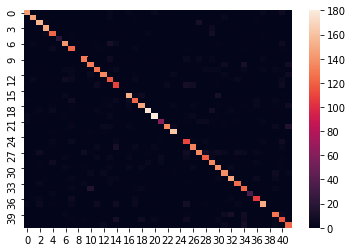

In [52]:
sns.heatmap(cm)

In [53]:
model.score(X_test,y_test)

0.811276560147231

##### Saving the model

In [54]:
import joblib

In [55]:
joblib.dump(model,open("best State Mangament",'wb'))

In [56]:
model.predict([[638410,3831,56666]])

array([16])